# <center>Statistical Inference on Whether Ticket Classes affect Survival on the RMS Titanic
#### **Authors:** Divesh Goyal, Luke Huang, Akshat Kalra, Eunbee Ham
#### **Group:** 49

## 1. Introduction

On April 15, 1912, the supposedly unsinkable British passenger liner, RMS Titanic, tragically struck an iceberg and sank to the bottom of the Atlantic Ocean with approximately 2200 passengers on board. Out of the ~2200 passengers, just over 1500 lost their lives to the disaster (Titanic Inquiry Project, 1998-2017). The passengers include people from a variety of socio-economic backgrounds and as such, resided in different ticket classes on the ship (Hall, 1986). This begs the following question:

#### <center>Does a passenger's ticket class on the Titanic determine whether they survived or not?

To analyze this question, we will use the difference in proportion of passengers residing in the upper class who survived vs passengers in the lower class who survived. The scale parameter will be standard error of proportions.
- We chose difference in proportions since the survival and ticket class variables are discrete which means that there is a fixed amount of possibilities for the variable. Thus, we can compare the amount of passengers for each discrete value with the total number of passengers.
- We chose standard error as we are using proportions and would like to calculate how much our statistic will differ from the population proportion.

<img src="https://www.rmg.co.uk/sites/default/files/styles/full_width_2600/public/Atlantic%20liner%20%27Titanic%27%20%28Br%2C%201912%29%20sinking%2C%20bow%20first%2C%201912%2C%20with%20eight%20full%20lifeboats%20nearby%20and%20an%20iceberg%20in%20the%20distance_banner.jpg?itok=AvBc7Sno" width="700"/>

The dataset that will be used is the [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data) data set from Kaggle. This dataset contains information on 891 passengers aboard the Titanic and the following information for each passenger:
- *`Survival`* (Whether the passenger survived or not)
- *`Pclass`* (Ticket class being one of first, second, or third class)
- *`Sex`*
- *`Age`* (Age in years)
- *`sibsp`* (Number of siblings/spouses on the Titanic)
- *`parch`* (Number of parents/children on the Titanic)
- *`Ticket`* (Ticket number)
- *`Fare`* (Passenger fare in Britain's pre-decimalised currency format (£))
- *`Cabin`* (Cabin number)
- *`Embarked`* (Port where the passenger boarded the Titanic)

***<center>We chose to analyze the ticket class factor on survival as this would produce an interesting insight on how socioeconomic status affects survival and whether one could essentially pay more for a safer journey (Hall, 1986).***

## 2a. Methods and Results

### 2.1. Loading necessary libraries

In [1]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(dplyr)
library(broom)
library(knitr)
library(grid)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp




### 2.2. Getting the dataset from the web

* To import the dataset, we will download it from a Github repository so that the code is reproducible and self-contained.

In [2]:
# Store the raw Github url of the dataset
url <- "https://raw.githubusercontent.com/lhuang20/Titanic-Dataset/main/titanic.csv"

# Download titanic.csv from the url
download.file(url, "titanic.csv")

# Store the dataset into variable
titanic <- read.csv("titanic.csv")

# Display the first few rows of the dataset
head(titanic)

# Display the names of each column in the dataset
colnames(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

<center>Table 1: Titanic Dataset

### 2.3. Selecting columns for analysis

* To conduct our analysis on the data set, we will select the columns that we are focusing on: *`Survived`*, *`Fare`*, and *`Pclass`*.

In [3]:
titanic_selected <- titanic |> 
                    select(Survived, Fare, Pclass) # select columns of interest

head(titanic_selected)

,Survived,Fare,Pclass
,<int>,<dbl>,<int>
1,0,7.2500,3
2,1,71.2833,1
3,1,7.9250,3
4,1,53.1000,1
5,0,8.0500,3
6,0,8.4583,3


<center>Table 2: Titanic Dataset with Columns of Interest

### 2.4. Exploratory data analysis

* We will conduct our analysis by grouping passengers into 2 different classes based on the ticket fare they paid. But first, let's explore our data for any abnormalities/outliers.

In [4]:
# Checking Survived column for values other than 0 and 1
titanic_survived <- titanic_selected |>
                    group_by(Survived) |>
                    summarise(Passengers = n()) # total number of passengers for each Survived group

titanic_survived

Survived,Passengers
<int>,<int>
0,549
1,342


<center>Table 3: Number of Passengers in Each Survival Group

In [5]:
# Checking Pclass column for values other than 1, 2 or 3
titanic_Pclass <- titanic_selected |>
                  group_by(Pclass) |>
                  summarise(Passengers = n()) # total number of passengers for each Pclass group

titanic_Pclass

Pclass,Passengers
<int>,<int>
1,216
2,184
3,491


<center>Table 4: Number of Passengers in Each Pclass Group (1, 2, 3)

* Tables 3 and 4 show no abnormalities in the *`Survived`* and *`Pclass`* columns. Let's now check the *`Fare`* column by producing a distribution of fares to observe for outliers.

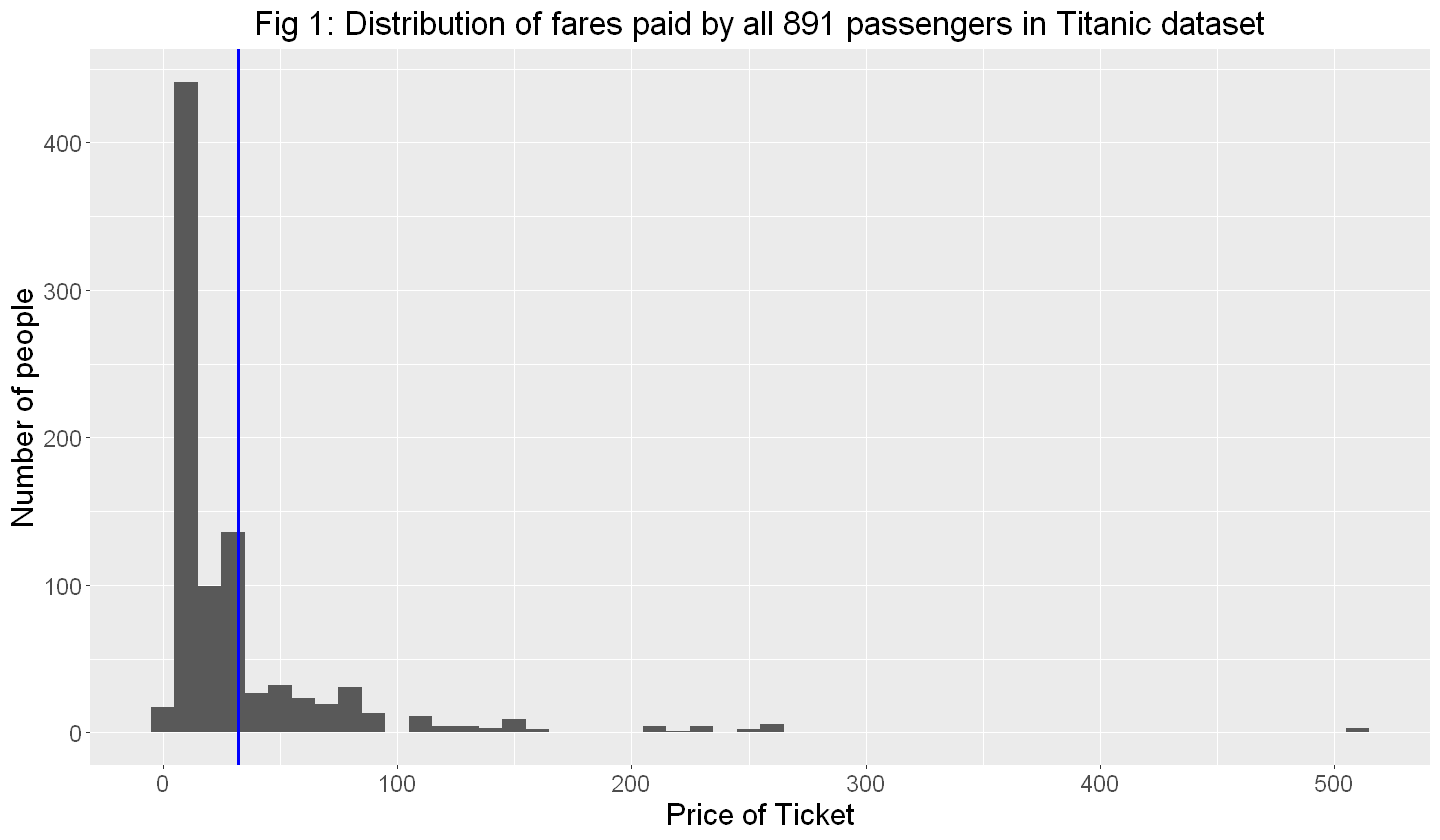

In [37]:
# Set size of plot
options(repr.plot.width=12, repr.plot.height=7)

# Histogram plot of fare paid by all 891 passengers in Titanic dataset
# Vertical blue line represents mean ticket fare
titanic_fare_dist <- titanic_selected |>
                     ggplot() +
                     geom_histogram(aes(x = Fare), binwidth = 10) +
                     geom_vline(aes(xintercept = mean(Fare)), col = 'blue', linewidth = 1) + # draws a vertical line indicating position of mean fare amount
                     ggtitle("Fig 1: Distribution of fares paid by all 891 passengers in Titanic dataset") +
                     xlab("Price of Ticket") +
                     ylab("Number of people") +
                     theme(plot.title = element_text(size=24)) + # make plot title a bit larger
                     theme(plot.title = element_text(hjust = 0.5)) + # Centers the title of the plot
                     theme(axis.text=element_text(size=14),
                           axis.title=element_text(size=18),
                           plot.title = element_text(size=20))
titanic_fare_dist

* Figure 1 shows some passengers paying a fare of just over £500. This may have been the Cardeza family who had some of the most expensive tickets on board (Encyclopedia Titanica, 2017) We also see that the distribution is skewed right with the mean ticket price less than £40. However, there were also some passengers who paid a fare of 0. Let's look at how many there were:

In [7]:
# Checking Fare column for passengers who paid a fare of 0
titanic_fare <- titanic_selected |> 
                filter(Fare == 0) |>
                group_by(Pclass) |>
                summarise(Passengers = n())

titanic_fare

Pclass,Passengers
<int>,<int>
1,5
2,6
3,4


<center>Table 5: Number of Passengers Who Paid a Fare of 0

* Table 5 shows 15 (5+6+4) passengers in the dataset who paid a fare of 0.
* These passengers are roughly distributed between the 3 ticket class under Pclass (1, 2, 3). Including fares of 0 in our definition of ticket class would create some inaccuracies in our analysis.
* When we look deeper into each of these passengers using the Titanic crew list here: https://www.encyclopedia-titanica.org/titanic-crew-list/, we can see that they were employees of `"White Star Line"` or `"Harland and Wolff"` which were companies that operated and built the Titanic respectively.
* As these passengers were part of the crew, they have no indication of socioeconomic class on the Titanic. Thus, we will filter out these passengers here:

In [8]:
titanic_filtered <- titanic_selected |> 
                    filter(Fare != 0)

tail(titanic_filtered)

,Survived,Fare,Pclass
,<int>,<dbl>,<int>
871,0,29.125,3
872,0,13.000,2
873,1,30.000,1
874,0,23.450,3
875,1,30.000,1
876,0,7.750,3


<center>Table 6: Filtered Titanic Dataset

### 2.5. Defining upper and lower ticket classes

* In the Titanic dataset, passengers were split into 3 classes (*`Pclass`*: 1, 2, 3). However, we wish to conduct our hypothesis test simply based on whether someone was an "upper" class or "lower" class traveller. To do this, we will split the passengers into two classes using the fare paid by each passenger. First we must obtain the mean fare from each *`Pclass`*:

In [9]:
titanic_mean <- titanic_filtered |> 
                group_by(Pclass) |> 
                summarize(mean = mean(Fare)) # mean fare paid by each Pclass group

titanic_mean

Pclass,mean
<int>,<dbl>
1,86.14887
2,21.35866
3,13.78787


<center>Table 7: Mean Fare Paid by Passengers of each Pclass

* Table 7 shows that the fare paid by someone travelling in first class is significantly higher than the fare paid by someone travelling in *second* or *third* class.

* We will plot the histograms for the fare paid by each of the classes to visualize how combining the different classes should go.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


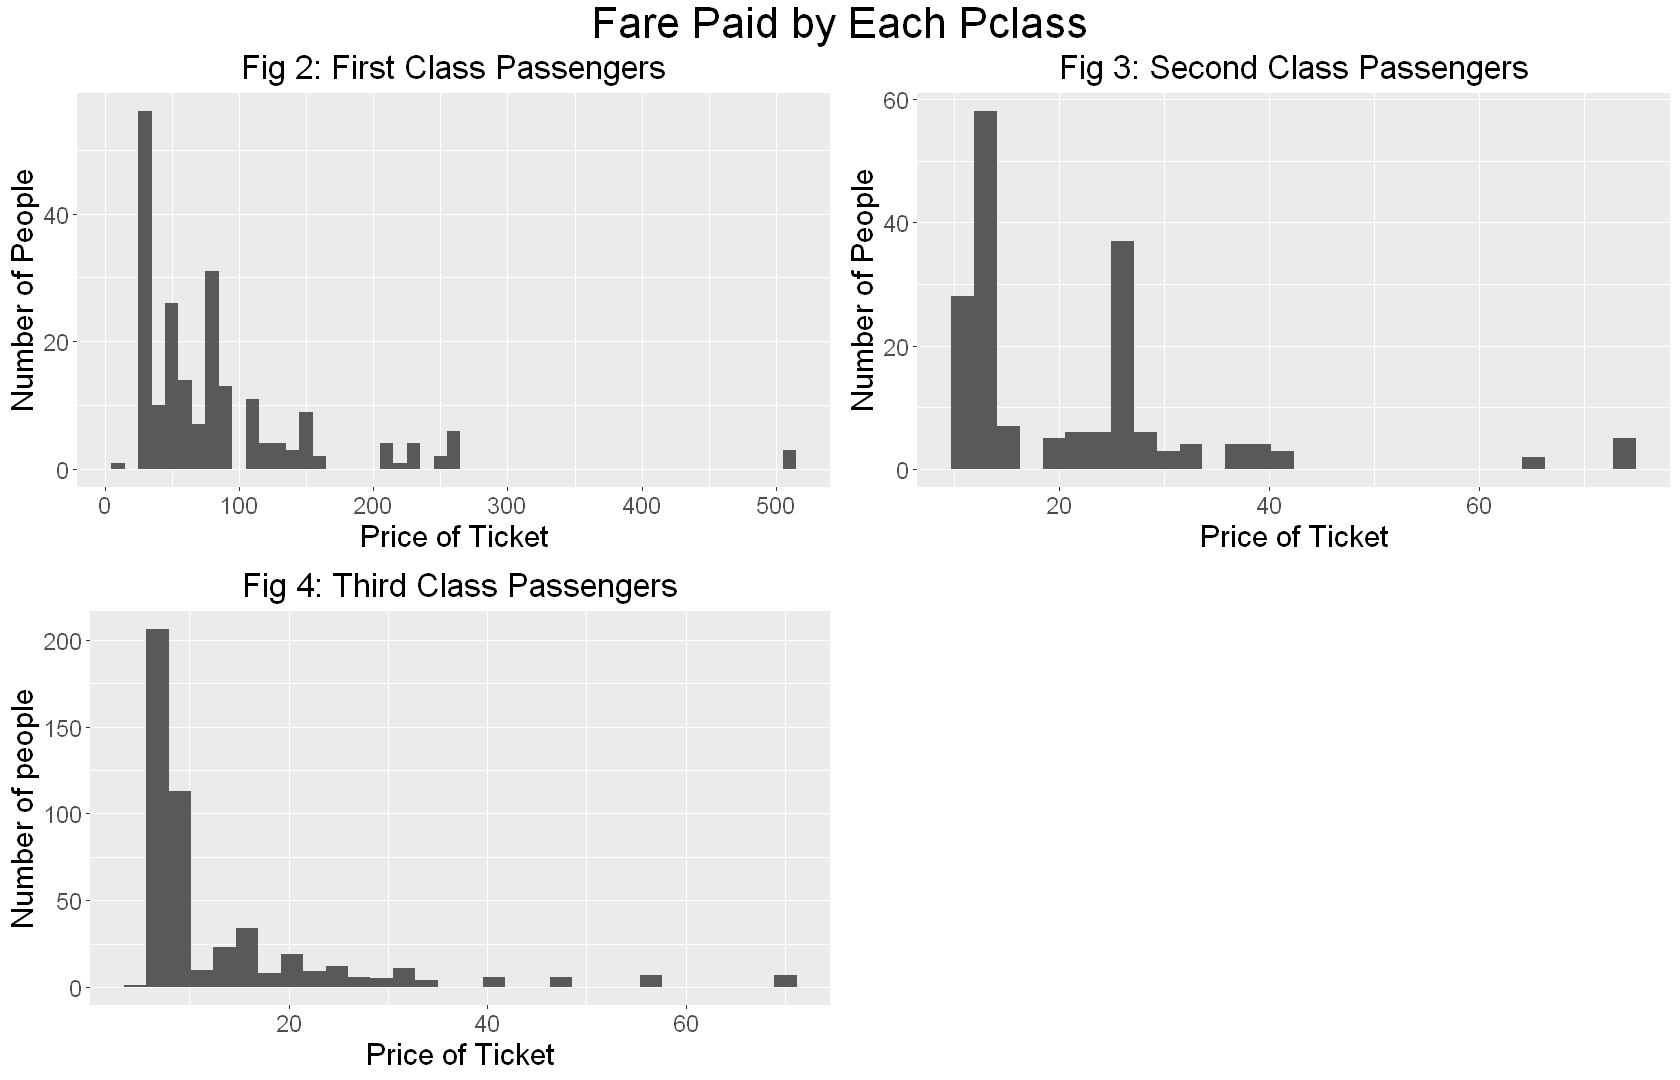

In [35]:
# Set size of plots
options(repr.plot.width=14, repr.plot.height=9)

# Histogram plot of fare paid by passengers of First Class (Pclass 1)
titanic_class1 <- titanic_filtered |>
                  filter(Pclass == 1) |>
                  ggplot() +
                  geom_histogram(aes(x = Fare), binwidth = 10) +
                  ggtitle("Fig 2: First Class Passengers") +
                  xlab("Price of Ticket") +
                  ylab("Number of People") +
                  theme(plot.title = element_text(size=22)) + # make plot title a bit larger
                  theme(plot.title = element_text(hjust = 0.5)) + # Centers the title of the plot
                  theme(axis.text=element_text(size=14),
                        axis.title=element_text(size=18),
                        plot.title = element_text(size=20))

# Histogram plot of fare paid by passengers of Second Class (Pclass 2)
titanic_class2 <- titanic_filtered |>
                  filter(Pclass == 2) |>
                  ggplot() +
                  geom_histogram(aes(x = Fare)) +
                  ggtitle("Fig 3: Second Class Passengers") +
                  xlab("Price of Ticket") +
                  ylab("Number of People") +
                  theme(plot.title = element_text(size=22)) + # make plot title a bit larger
                  theme(plot.title = element_text(hjust = 0.5)) + # Centers the title of the plot
                  theme(axis.text=element_text(size=14),
                        axis.title=element_text(size=18),
                        plot.title = element_text(size=20))

# Histogram plot of fare paid by passengers of Third Class (Pclass 3)
titanic_class3 <- titanic_filtered |>
                  filter(Pclass == 3) |>
                  ggplot() +
                  geom_histogram(aes(x = Fare)) +
                  ggtitle("Fig 4: Third Class Passengers") +
                  xlab("Price of Ticket") +
                  ylab("Number of people") +
                  theme(plot.title = element_text(size=22)) + # make plot title a bit larger
                  theme(plot.title = element_text(hjust = 0.5)) + # Centers the title of the plot
                  theme(axis.text=element_text(size=14),
                        axis.title=element_text(size=18),
                        plot.title = element_text(size=20))

#Grouping all three plots together
grid.arrange(titanic_class1,
             titanic_class2,
             titanic_class3,
             nrow = 2,
             ncol = 2,
             top = textGrob("Fare Paid by Each Pclass",
                            gp=gpar(fontsize=26)))

* Figures 2, 3 and 4 show that the Fare paid by passengers in the *second* and *third* class have a similar spread, with many passengers paying between £5 and £40.

* We will hence take the mean value of tickets between the *second* and *third* class and use it to split passengers into upper and lower class.

In [11]:
lower_mean <- titanic_filtered |> 
              filter(Pclass == 2 | Pclass == 3) |> 
              summarize(mean = mean(Fare)) |>
              select(mean)

lower_mean

mean
<dbl>
15.81434


<center>Table 8: Mean Ticket Price Paid by Second and Third Class Combined

* From Table 8, we see the mean ticket price paid by *second* and *third* class combined is about £15.81.

* We will use this value to split the upper and lower ticket classes. Here we combine the people who paid under the mean into lower class and the people who paid more than the mean into upper class. We will also change the data in *`Survived`* so that *`1`* = *`Alive`* and *`0`* = *`Dead`* in order to calculate difference in proportions in **3.1**

In [12]:
titanic_tidy <- titanic_filtered |> 
                mutate(filter = Fare > pull(lower_mean)) |> # since lower_mean is stored in a table, we must pull the raw number using pull()
                mutate(Pclass = fct_recode(as_factor(filter), Upper='TRUE', Lower='FALSE')) |> # combining passengers who paid Fare>mean of the lower classes into "Upper" and the rest into "Lower"
                mutate(Survived = fct_recode(as_factor(Survived), Alive='1', Dead = '0')) |>  # change the data in the Survived column from integers to discrete labels: "Dead" and "Alive"
                select(Survived, Pclass)

head(titanic_tidy)

,Survived,Pclass
,<fct>,<fct>
1,Dead,Lower
2,Alive,Upper
3,Alive,Lower
4,Alive,Upper
5,Dead,Lower
6,Dead,Lower


<center>Table 9: Tidied Titanic Dataset with *Upper* and *Lower* Pclasses

* We can also see that the number of passengers in each class (*upper* and *lower*) are roughly equal here:

In [13]:
titanic_tidy_n <- titanic_tidy |>
                  group_by(Pclass) |>
                  summarise(Passengers = n())

titanic_tidy_n

Pclass,Passengers
<fct>,<int>
Lower,463
Upper,413


<center>Table 10: Number of Passengers in Each Pclass Group (Upper and Lower)

### 2.6. Visualizing raw proportion data from dataset

* We will now compute proportions for all passengers who survived from the dataset and plot this data

In [14]:
# Count the number of passengers in upper and lower ticket classes
n_class <- titanic_tidy |> 
           group_by(Pclass) |>
           tally()
# n_class

# Count the number of passengers in upper and lower ticket classes who survived
n_class_survived <- titanic_tidy |> 
                    group_by(Pclass, Survived) |> 
                    tally() |>
                    filter(Survived == "Alive") # filter for survivors
# n_class_survived

# Calculate the proportion of passengers who survived in upper and lower ticket classes
prop_class <- merge(x = n_class_survived, y = n_class, by = "Pclass") |>
              mutate(prop = (n.x/n.y)) |>
              select(Pclass, prop) # select class and proportion columns
# prop_class

<caption><center>Table 7: Proportion of survived passengers by PClass</center></caption>

|Pclass |     prop|
|:------|--------:|
|Lower  | 32.38381|
|Upper  | 59.80861|



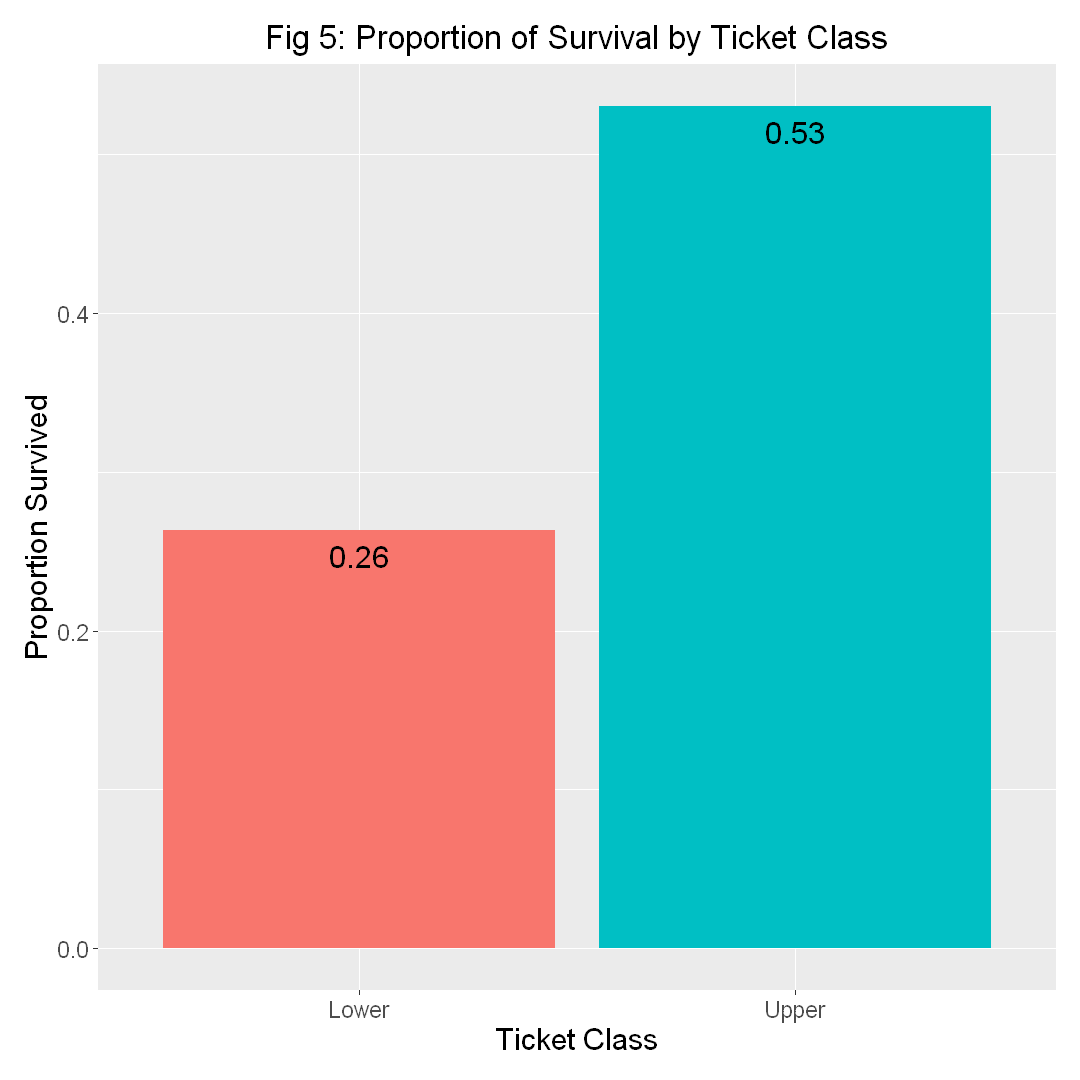

In [41]:
# Set size of plot
options(repr.plot.width=9, repr.plot.height=9)

# Create the bar graph for survival between ticket classes
prop_bar <- prop_class |>
            ggplot(aes(x = Pclass, y = prop, fill = Pclass)) +
            geom_col() +
            geom_text(aes(label = round(prop, 2)), vjust=1.6, color = "black", size=6.5) + # adds text above each bar showing proportion values rounded to 2 decimal places
            ggtitle("Fig 5: Proportion of Survival by Ticket Class") +
            labs(x = "Ticket Class", y = "Proportion Survived") +
            scale_fill_manual(values = c("Upper" = "#00BFC4", "Lower" = "#F8766D")) + # Manually choose colors for each bar
            theme(legend.position = "none") + # Removes legend that comes with scale_fill_manual
            theme(plot.title = element_text(hjust = 0.5)) + # Centers the title of the plot
            theme(axis.text=element_text(size=14),
                  axis.title=element_text(size=18),
                  plot.title = element_text(size=20))  +
            theme(plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"))

prop_bar

* #### *Figure 5 shows a noticable difference in survival between the upper and lower ticket classes*

## 2b. Methods: Plan

### 2.7. Hypothesis testing

The estimates and plots produced in **2.6** are not sufficient as there is no mention of how strong our evidence is. Thus, we will need to construct a hypothesis test to evaluate the reliability of our conclusions. We plan on supporting our data by testing the following hypothesis: 


- $H_0:{p}_u-{p}_l = 0 $ 

- $H_a:{p}_u-{p}_l ≠ 0 $
    

where ${p}_u$ is the proportion of survivors in upper class and ${p}_l$ is the proportion of survivors in the lower class. The null hypothesis ($H_0$) states that there is no difference in survival rates between upper and lower class while the alternative ($H_a$) states that there is a difference in survival rates between the two classes.

We will be using a significance level of $\alpha$ = 0.05 as this would give us a balance between the risk of type 1 and type 2 errors. We don't want a low $\alpha$ value as this would increase the chance of type 2 error (false negative) which is worse in this case than a type 1 error. A type 2 error would mean that we think there is no difference when there is actually difference in survival. This type of error would cause We also do not want to choose a high $\alpha$ value as this would decrease the amount of evidence needed to make a statistically significant conclusion.

### 2.8. Creating the null model

* Now, we calculate the summary statistic and make a null distribution using the Infer package.

In [16]:
# Set seed so that the data is reproducible
set.seed(69)

# Create null distribution
null_distribution <- titanic_tidy |>
                     specify(formula = Survived ~ Pclass, success = "Alive") |> 
                     hypothesize(null = "independence") |> # using null = "independence" for two sample test
                     generate(reps = 1000, type = "permute") |> 
                     calculate(stat = "diff in props", order = c("Upper", "Lower"))

head(null_distribution)

replicate,stat
<int>,<dbl>
1,-0.026425198
2,-0.044749737
3,0.014805014
4,-0.008100659
5,0.023967284
6,0.014805014


<center>Table 11: 1000 samples taken from the Null Model using Infer Package

### 2.9. Calculating test statistic 

* Here we calculate the observed difference in survival rates using Infer.

In [17]:
obs_diff_prop <- titanic_tidy |> 
                 specify(Survived ~ Pclass, success = "Alive") |> 
                 calculate(stat = "diff in props", order = c("Upper", "Lower"))

obs_diff_prop

stat
<dbl>
0.2667674


<center>Table 12: Observed Difference in Proportions

### 3.0. Visualizing the p-value

* The final step is to visualize the p-value on the null distribution.

* This means that in a hypothesized world where there was no difference in survival rates between upper and lower class, how surprised would we be to see a difference in survival rate of $26.7$%?

* We do this by first visualizing the null distribution using the `visualize()` function in Infer, and then we use the `shade_p_value` function and set `obs_stat` to `obs_diff_prop` and we will set the `direction = "right"` because our alternative hypothesis is "more extreme" than the hypothesized world.

Warning message in min(diff(unique_loc)):
"no non-missing arguments to min; returning Inf"


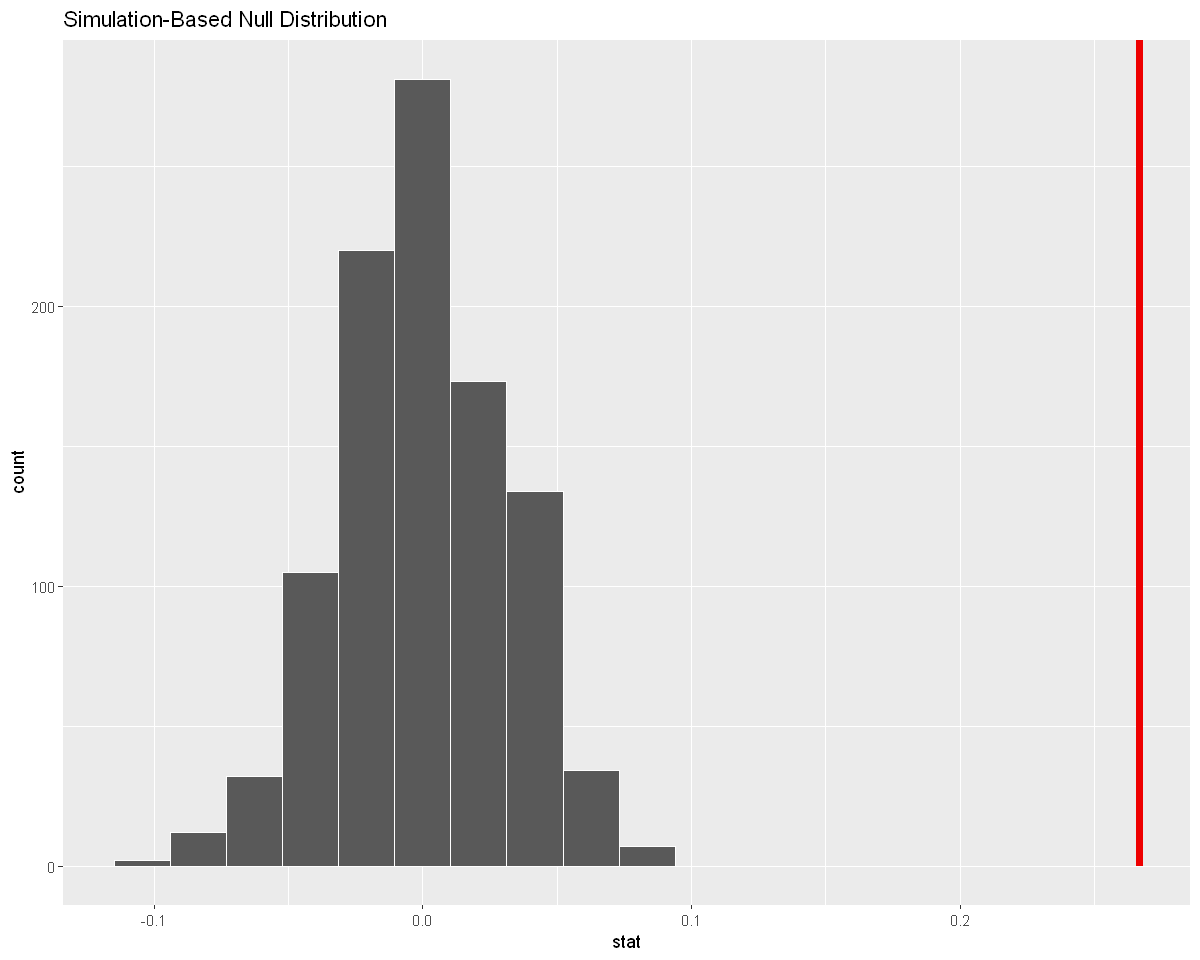

In [18]:
# Set size of plot
options(repr.plot.width=10, repr.plot.height=8)

visualize(null_distribution, bins = 10) +
    shade_p_value(obs_stat = obs_diff_prop, direction = "right")

<center>Fig 6: Simulation-Based Null Distribution

* So, by visualizing the p-value on the null distribution, we can tell that we will rarely ever or never observe difference in survival rates of $26.7$ % in a hypothesized world of no difference in survival rates between upper and lower class.

* Hence, we would be inclined to reject the null hypothesis, in statistical terminology - "Reject $H_0$".

### 3.1. Computing the p-value

* We can compute the p-value using `get_p_value` function with `obs_stat = obs_diff_prop` and `direction = "right"`.

In [19]:
null_distribution |> 
  get_p_value(obs_stat = obs_diff_prop, direction = "right")

Warning message:
"Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information."


p_value
<dbl>
0


<center>Table 13: P-value calculated from Null Distribution

* This tells us that the probability of observing a difference in survival rates between upper and lower class as large as $26. 7$%, due to sampling variation in a null distribution is 0%.

* Since the p-value is smaller than our pre-specified significance level i.e. $\alpha$ = 0.05, we reject the null hypothesis $H_0:{p}_u-{p}_l = 0 $.

### 3.2. Bootstrap method for difference in proportions

* We will now use bootstrapping methods to test our hypothesis.

In [20]:
# Set seed so that the data is reproducible
set.seed(69)

# Generating samples using bootstrapping with reps = 1000
bootstrap_distribution <- titanic_tidy |> 
                          specify(formula = Survived ~ Pclass, success = "Alive") |> 
                          generate(reps = 1000, type = "bootstrap") |> 
                          calculate(stat = "diff in props", order = c("Upper", "Lower"))
head(null_distribution)

replicate,stat
<int>,<dbl>
1,-0.026425198
2,-0.044749737
3,0.014805014
4,-0.008100659
5,0.023967284
6,0.014805014


<center>Table 14: 1000 samples taken using Bootstrapping with the Infer Package

In [21]:
# Generate upper and lower confidence intervals with 95% confidence
percentile_ci <- bootstrap_distribution |>
                 get_confidence_interval(level = 0.95, type = "percentile")
percentile_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.2051506,0.3286404


<center>Table 15: Upper and Lower Bounds of 95% Confidence Interval from Bootstrapping

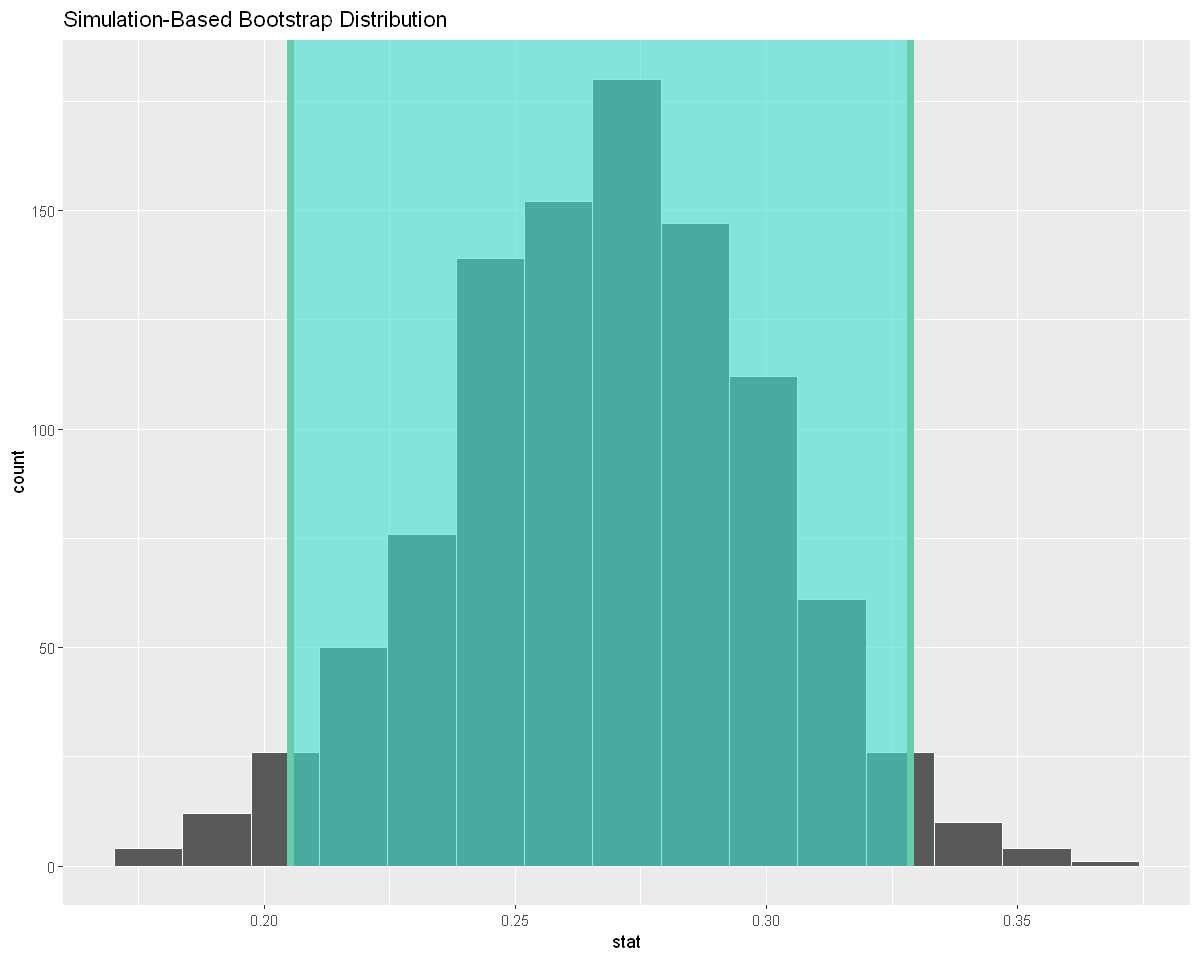

In [22]:
# Set size of plot
options(repr.plot.width=10, repr.plot.height=8)

# Visualize 95% confidence interval on bootstrap distribution
visualize(bootstrap_distribution) + 
  shade_confidence_interval(endpoints = percentile_ci)

<center>Figure 7: Simulation-Based Bootstrap Distribution with 95% Confidence Interval overlaid

* From Figure 7, we are 95% confident that the true difference in population proportions ${p}_u-{p}_l$ lies between $20.5$% and $32.9$%

* This indicates that the difference between upper and lower class survival is not insignificant

* We can also see that the value 0 is not included in our interval suggesting that ${p}_u$ and ${p}_l$ are totally different and since the confidence interval lies over 0, it means that the difference is in favour of the upper class.

### 3.3. Standard Error Method

* Since, the bootstrap distribution is roughly normally shaped, we can also compare it with confidence interval generated from the standard error method.

* For this, we would use the `get_confidence_interval` function and set `level = 0.95`, `type = "se"` and `point_estimate = obs_diff_prop`.

In [23]:
# Using 95% confidence
se_ci <- bootstrap_distribution |> 
  get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = obs_diff_prop)
se_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.2054117,0.3281232


<center>Table 16: Upper and Lower Bounds of 95% Confidence Interval from standard error method

### 3.4. Visualize using Standard Error Method

* Now, let's visualize the bootstrap distribution again using the confidence interval we calculated using the standard error method.

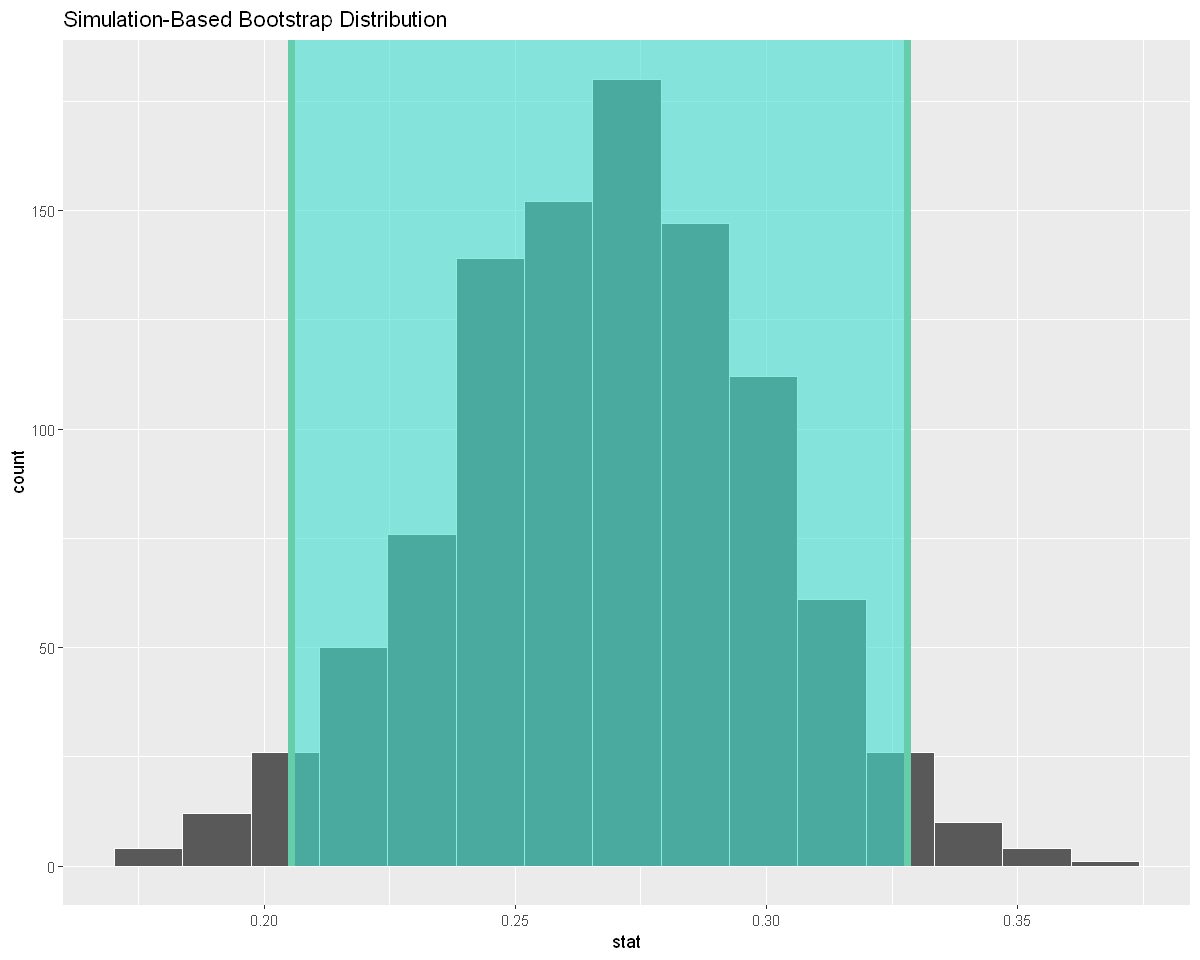

In [24]:
# Set size of plot
options(repr.plot.width=10, repr.plot.height=8)


visualize(bootstrap_distribution) +
    shade_ci(endpoints = se_ci)

<center>Figure 8: Simulation-Based Bootstrap Distribution using standard error method

* Again, here we notice that the value 0 is not included in the confidence interval that shows that ${p}_u$ and ${p}_l$ are truly different 

### 3.5. Two-Sample Z-Test : Comparing the proportions of two independent population using asymptotics

The case to be considered here is: 

- $H_0: p_u - p_l = 0$ 

vs 

- $H_a: p_u - p_l ≠ 0$

To test $H_0$, we use the following test statistic:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

Pooled proportion is given by :
 $$\hat{p} = \frac{n_1\hat{p}_1+n_2\hat{p}_2}{n_1+n_2}$$

In [25]:
# Create variable for upper class passengers
sample_1 <- titanic_tidy |>
            filter(Pclass == "Upper")

# Create variable for lower class passengers
sample_2 <- titanic_tidy |>
            filter(Pclass == "Lower")

# Use R's prop.test() function to calculate p-value given by Z-test. Also using broom::tidy() to get an organised result
stats <- tidy(prop.test(x = c(sum(sample_1$Survived == "Alive"), sum(sample_2$Survived == "Alive")), # an array with the number of successes in each sample
                  n = c(nrow(sample_1), nrow(sample_2)),
                  alternative = "two.sided",                                                    # an array with the size of each sample
                  correct = FALSE)) 
stats

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.5302663,0.2634989,65.34202,6.296427e-16,1,0.2041019,0.329433,2-sample test for equality of proportions without continuity correction,two.sided


<center>Table 17: Results using prop.test() from 2-sample Z-test

* In the code above (**3.5**), we used the prop.test() function in R to calculate the values we need (p-value, conf.low, conf.high) using a 2-sample Z-test for comparing proportions. We also used broom::tidy() to get an organized result 
* Table 17 gives us our p-value of 6.296427e-16.
* This value is much smaller than our significance level $\alpha$ = 0.05 i.e. 6.296427e-16 < 0.05.
* #### *Due to this, we will reject the null hypothesis at a 5% significance level.*

## 4. Discussion

### 4.1. Bootstrapping vs Asymptotics

<table>
<thead>
<tr>
<th style="empty-cells: hide;border-bottom:hidden;" colspan="1"></th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: left; font-weight: bold; font-style: italic; " colspan="2"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Bootstrap</div></th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; font-weight: bold; font-style: italic; " colspan="2"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Asymptotic</div></th>
</tr>     
  <tr>
   <th style="text-align:right;"> Lower C.I. </th>
   <th style="text-align:right;"> Upper C.I. </th>
   <th style="text-align:right;"> Lower C.I. </th>
   <th style="text-align:right;"> Upper C.I. </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 0.2051506 </td>
   <td style="text-align:right;"> 0.3286404 </td>
   <td style="text-align:right;"> 0.2041019 </td>
   <td style="text-align:right;"> 0.329433 </td>
  </tr>
</tbody>
</table>
&nbsp;<center>Table 18: Comparing Confidence interval from Bootstrapping and Asympotic Method (Two-sample Z-test)</center>

From our preliminary analyses, we expected to find a difference in survival between passengers in upper vs lower class. We tested our hypothesis using both bootstrapping and asymptotic methods. For the asymptotic method, we chose to use a Z-test instead of a t-test as we are calculating proportions. Additionlly, the t-test relies on the assumption that the data is normally distributed which is not the case here since the randam variable is discrete (0-1).

Looking at our results using bootstrapping and asymptotics from **3.1** and **3.5** respectively, both methods reported similar p-values. Both methods produced significant results under our significance level of 𝛼 = 0.05. Additionally, the 95% confidence intervals produced by bootstrapping and asymptotics were nearly identical with the true difference in proportions lying between [20.5%, 32.9%] and [20.4%, 32.9%] respectively. 

In general, bootstrapping methods are advantageous as they can be used to obtain a sampling distribution of the statistic that would be otherwise unknown with theory based approaches. It does not rely on the assumption of normality and thus can be more beneficial with smaller sample sizes. However, we are able to use asymptotics (Z-test) as we have a large enough sample size (np̂ ≥ 10) and n(1 - p̂) ≥ 10 so that the null model is a fairly good approximation when relying on the CLT.

### 4.2. Conclusion

We observed that our p-value obtained from bootstrapping was p < 0.001 while with asymptotics (two-sample Z-test) was 6.296427e-16. At our chosen significance level of $\alpha$ = 0.05, we can reject the null hypothesis and conclude that there may have been a difference between ticket class and survival rate on the Titanic. These findings are important as they can potentially be used in other industries to save lives. For example, regulators may want to eliminate socioeconomic class discrimination on cruise ships and planes by allowing all classes to have equal access to lifesaving emergency equipment. In context, this information would have allowed the Titanic to be better prepared in its emergency practices by positioning lifeboats near all ticket classes instead of only upper classes (Hall, 1986). As such, knowing whether ticket class plays a role in passenger survival will allow us to explore other factors that may influence survival, such as sex or age.

### 4.3. Explainations for findings and futher research

From external research, it was found that the location of the first-class passengers on the upper deck of the Titanic provided them easier access to lifeboats, and they were given priority to board them (Hall, 1986). However, some men gave up their priority, and women and children from all classes were given priority instead, leading to a higher survival rate for them. This indicates that socioeconomic status alone was not the only factor affecting survival rates (Stolz et al. 2019).

The timing of the accident and limited visibility at night were other factors impacting the survival rate. Additionally, physical health played a role, as individuals in better health were more likely to be able to swim, climb, and endure the cold water (Stolz et al. 2019).

Although the first-class passengers had advantages, such as access to lifeboats, it is clear that other factors also played a significant role in survival. It is worth considering whether the disaster led to improvements in emergency protocols with regards to class differences and how society can work towards ensuring that all individuals have equal access to life-saving resources in emergency situations.

## 5. References

Titanic Inquiry Project. (1998-2017). *Titanic Inquiry Project*. Retrieved March 18, 2023, from https://www.titanicinquiry.org/.

Hall, W. (1986). Social class and survival on the S.S. Titanic. *Social Science & Medicine, 22*(6), 687–690. https://doi.org/10.1016/0277-9536(86)90041-9.

Stolz, J., Lindemann, A., & Antonietti, J. (2019). Sociological explanation and mixed methods: the example of the Titanic. *Quality & Quantity, 53*(3), 1623–1643. https://doi.org/10.1007/s11135-018-00830-0.

Li, J., Cukierski, W. (2012). Titanic - Machine Learning from Disaster. *Kaggle*. Retrieved March 17, 2023, from https://www.kaggle.com/competitions/titanic/data?select=train.csv.

Encyclopedia Titanica. (2017). *Charlotte Wardle Cardeza*. Retrieved April 12, 2023, from https://www.encyclopedia-titanica.org/titanic-survivor/charlotte-cardeza.html.

Encyclopedia Titanica. (2023). *Titanic Crew List*. Retrieved April 12, 2023, from https://www.encyclopedia-titanica.org/titanic-crew-list/.